In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import maxnorm



# fix random seed for reproducibility
seed = 7
np.random.seed(seed)


Using TensorFlow backend.
C:\Users\POLADI KALYAN REDDY\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\POLADI KALYAN REDDY\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\POLADI KALYAN REDDY\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\POLADI KALYAN REDDY\anaconda3

In [2]:
Gamer=pd.read_csv("F:/programming for data analysis/kalyan reddy poladi/car.csv")

In [3]:
Gamer.head()

,buying_price,maintainance_cost,no_of_doors,no_of_persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
cardata=Gamer.copy()
Gamer['decision'].replace(['unacc','acc','good','vgood'],[0,1,1,1], inplace=True) 
Gamer['buying_price'].replace(['low', 'med',  'high','vhigh',],[0,1,2,3], inplace=True)
Gamer['maintainance_cost'].replace(['low', 'med',  'high','vhigh',],[0,1,2,3], inplace=True)
Gamer['no_of_doors'].replace(['2', '3', '4', '5more'],[0,1,2,3], inplace=True) 
Gamer['no_of_persons'].replace(['2', '4', 'more'],[0,1,2], inplace=True) 
Gamer['lug_boot'].replace(['small', 'med', 'big'],[0,1,2], inplace=True)
Gamer['safety'].replace(['low', 'med', 'high'],[0,1,2], inplace=True)
Gamer.head()


,buying_price,maintainance_cost,no_of_doors,no_of_persons,lug_boot,safety,decision
0,3,3,0,0,0,0,0
1,3,3,0,0,0,1,0
2,3,3,0,0,0,2,0
3,3,3,0,0,1,0,0
4,3,3,0,0,1,1,0


(array([1210.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         518.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

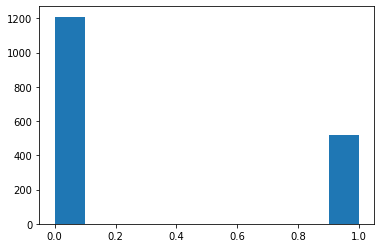

In [5]:
plt.hist((Gamer.decision))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015B85F8B8C8>,
      dtype=object)

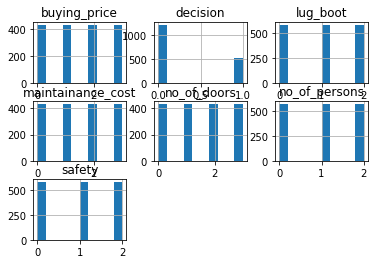

In [6]:
Gamer.hist()

In [7]:
X = Gamer.drop(['decision'], axis = 1)
y = Gamer['decision']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Split Data to Train and Test


# create model
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2, weights='uniform')

predictions = knn.predict(X_test)

score = accuracy_score(y_test, predictions)
print(score)

0.9826589595375722


In [8]:
model = Sequential()
model.add(Dense(25, input_dim=6, init='uniform', activation='relu'))
model.add(Dense(30, init='uniform', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(10, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='relu'))

# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, epochs=600, batch_size=10)

# Evaluate the model
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

C:\Users\POLADI KALYAN REDDY\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, input_dim=6, activation="relu", kernel_initializer="uniform")`
  
C:\Users\POLADI KALYAN REDDY\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_constraint=<keras.con..., kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\POLADI KALYAN REDDY\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="uniform")`
  """
C:\Users\POLADI KALYAN REDDY\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="relu", kernel_initializer="uniform")`
  



Epoch 1/600
1382/1382 [==============================] - 1s 604us/step - loss: 0.2152 - accuracy: 0.7185
Epoch 2/600
1382/1382 [==============================] - 0s 327us/step - loss: 0.1172 - accuracy: 0.8307
Epoch 3/600
1382/1382 [==============================] - 0s 213us/step - loss: 0.1031 - accuracy: 0.8582
Epoch 4/600
1382/1382 [==============================] - 0s 261us/step - loss: 0.1019 - accuracy: 0.8589
Epoch 5/600
1382/1382 [==============================] - 0s 318us/step - loss: 0.1021 - accuracy: 0.8553
Epoch 6/600
1382/1382 [==============================] - 0s 259us/step - loss: 0.1007 - accuracy: 0.8560
Epoch 7/600
1382/1382 [==============================] - 0s 171us/step - loss: 0.0978 - accuracy: 0.8589
Epoch 8/600
1382/1382 [==============================] - 0s 243us/step - loss: 0.0989 - accuracy: 0.8560
Epoch 9/600
1382/1382 [==============================] - 0s 197us/step - loss: 0.0971 - accuracy: 0.8625
Epoch 10/600
1382/1382 [==============================

1382/1382 [==============================] - 0s 156us/step - loss: 0.0218 - accuracy: 0.9725
Epoch 75/600
1382/1382 [==============================] - 0s 150us/step - loss: 0.0177 - accuracy: 0.9797
Epoch 76/600
1382/1382 [==============================] - 0s 150us/step - loss: 0.0188 - accuracy: 0.9768
Epoch 77/600
1382/1382 [==============================] - 0s 156us/step - loss: 0.0171 - accuracy: 0.9790
Epoch 78/600
1382/1382 [==============================] - 0s 156us/step - loss: 0.0153 - accuracy: 0.9797
Epoch 79/600
1382/1382 [==============================] - 0s 151us/step - loss: 0.0161 - accuracy: 0.9812
Epoch 80/600
1382/1382 [==============================] - 0s 150us/step - loss: 0.0176 - accuracy: 0.9776
Epoch 81/600
1382/1382 [==============================] - 0s 156us/step - loss: 0.0159 - accuracy: 0.9834
Epoch 82/600
1382/1382 [==============================] - 0s 162us/step - loss: 0.0142 - accuracy: 0.9855
Epoch 83/600
1382/1382 [==============================] - 0

1382/1382 [==============================] - 0s 179us/step - loss: 0.0081 - accuracy: 0.9913
Epoch 151/600
1382/1382 [==============================] - 0s 156us/step - loss: 0.0109 - accuracy: 0.9848
Epoch 152/600
1382/1382 [==============================] - 0s 150us/step - loss: 0.0100 - accuracy: 0.9884
Epoch 153/600
1382/1382 [==============================] - 0s 151us/step - loss: 0.0105 - accuracy: 0.9884
Epoch 154/600
1382/1382 [==============================] - 0s 156us/step - loss: 0.0053 - accuracy: 0.9942
Epoch 155/600
1382/1382 [==============================] - 0s 162us/step - loss: 0.0074 - accuracy: 0.9913
Epoch 156/600
1382/1382 [==============================] - 0s 156us/step - loss: 0.0073 - accuracy: 0.9913
Epoch 157/600
1382/1382 [==============================] - 0s 156us/step - loss: 0.0069 - accuracy: 0.9935
Epoch 158/600
1382/1382 [==============================] - 0s 156us/step - loss: 0.0082 - accuracy: 0.9891
Epoch 159/600
1382/1382 [==========================

Epoch 226/600
1382/1382 [==============================] - 0s 150us/step - loss: 0.0025 - accuracy: 0.9971
Epoch 227/600
1382/1382 [==============================] - 0s 150us/step - loss: 0.0037 - accuracy: 0.9942
Epoch 228/600
1382/1382 [==============================] - 0s 150us/step - loss: 0.0027 - accuracy: 0.9964
Epoch 229/600
1382/1382 [==============================] - 0s 165us/step - loss: 0.0017 - accuracy: 0.9986
Epoch 230/600
1382/1382 [==============================] - 0s 179us/step - loss: 0.0031 - accuracy: 0.9971
Epoch 231/600
1382/1382 [==============================] - 0s 220us/step - loss: 6.0599e-04 - accuracy: 1.0000
Epoch 232/600
1382/1382 [==============================] - 0s 260us/step - loss: 0.0018 - accuracy: 0.9971
Epoch 233/600
1382/1382 [==============================] - 0s 145us/step - loss: 0.0061 - accuracy: 0.9920
Epoch 234/600
1382/1382 [==============================] - 0s 191us/step - loss: 0.0074 - accuracy: 0.9899
Epoch 235/600
1382/1382 [========

1382/1382 [==============================] - 0s 145us/step - loss: 0.0076 - accuracy: 0.9906
Epoch 301/600
1382/1382 [==============================] - 0s 145us/step - loss: 0.0046 - accuracy: 0.9957
Epoch 302/600
1382/1382 [==============================] - 0s 139us/step - loss: 0.0041 - accuracy: 0.9935
Epoch 303/600
1382/1382 [==============================] - 0s 139us/step - loss: 0.0039 - accuracy: 0.9964
Epoch 304/600
1382/1382 [==============================] - 0s 139us/step - loss: 0.0041 - accuracy: 0.9957
Epoch 305/600
1382/1382 [==============================] - 0s 156us/step - loss: 5.2500e-04 - accuracy: 1.0000
Epoch 306/600
1382/1382 [==============================] - 0s 145us/step - loss: 0.0028 - accuracy: 0.9964
Epoch 307/600
1382/1382 [==============================] - 0s 145us/step - loss: 0.0020 - accuracy: 0.9978
Epoch 308/600
1382/1382 [==============================] - 0s 154us/step - loss: 2.2448e-04 - accuracy: 1.0000
Epoch 309/600
1382/1382 [==================

1382/1382 [==============================] - 0s 166us/step - loss: 8.1083e-04 - accuracy: 0.9993
Epoch 373/600
1382/1382 [==============================] - 0s 167us/step - loss: 0.0013 - accuracy: 0.9986
Epoch 374/600
1382/1382 [==============================] - 0s 165us/step - loss: 0.0058 - accuracy: 0.9942
Epoch 375/600
1382/1382 [==============================] - 0s 163us/step - loss: 0.0036 - accuracy: 0.9964
Epoch 376/600
1382/1382 [==============================] - 0s 168us/step - loss: 9.4518e-04 - accuracy: 0.9986
Epoch 377/600
1382/1382 [==============================] - 0s 201us/step - loss: 4.4355e-04 - accuracy: 1.0000 loss: 4.2770e-04 - accura
Epoch 378/600
1382/1382 [==============================] - 0s 198us/step - loss: 6.9498e-04 - accuracy: 1.0000
Epoch 379/600
1382/1382 [==============================] - 0s 185us/step - loss: 2.3222e-05 - accuracy: 1.0000
Epoch 380/600
1382/1382 [==============================] - 0s 166us/step - loss: 4.7223e-04 - accuracy: 0.9993
E

1382/1382 [==============================] - 0s 162us/step - loss: 0.0016 - accuracy: 0.9986
Epoch 447/600
1382/1382 [==============================] - 0s 162us/step - loss: 0.0014 - accuracy: 0.9978
Epoch 448/600
1382/1382 [==============================] - 0s 162us/step - loss: 0.0015 - accuracy: 0.9986
Epoch 449/600
1382/1382 [==============================] - 0s 162us/step - loss: 0.0060 - accuracy: 0.9935
Epoch 450/600
1382/1382 [==============================] - 0s 162us/step - loss: 0.0071 - accuracy: 0.9920
Epoch 451/600
1382/1382 [==============================] - 0s 156us/step - loss: 0.0021 - accuracy: 0.9978
Epoch 452/600
1382/1382 [==============================] - 0s 179us/step - loss: 6.7824e-04 - accuracy: 0.9993
Epoch 453/600
1382/1382 [==============================] - 0s 202us/step - loss: 0.0053 - accuracy: 0.9942
Epoch 454/600
1382/1382 [==============================] - 0s 191us/step - loss: 0.0014 - accuracy: 0.9993
Epoch 455/600
1382/1382 [======================

1382/1382 [==============================] - 0s 208us/step - loss: 0.0031 - accuracy: 0.9957
Epoch 522/600
1382/1382 [==============================] - 0s 226us/step - loss: 8.4199e-04 - accuracy: 0.9993
Epoch 523/600
1382/1382 [==============================] - 0s 208us/step - loss: 0.0024 - accuracy: 0.9971
Epoch 524/600
1382/1382 [==============================] - 0s 197us/step - loss: 0.0011 - accuracy: 0.9993
Epoch 525/600
1382/1382 [==============================] - 0s 171us/step - loss: 9.2920e-04 - accuracy: 0.9993
Epoch 526/600
1382/1382 [==============================] - 0s 174us/step - loss: 0.0015 - accuracy: 0.9986
Epoch 527/600
1382/1382 [==============================] - 0s 174us/step - loss: 0.0063 - accuracy: 0.9913TA: 0s - loss: 0.0021 - accuracy: 0.9941   - ETA: 0s - loss: 0.0026 - accuracy: 
Epoch 528/600
1382/1382 [==============================] - 0s 168us/step - loss: 0.0019 - accuracy: 0.9986
Epoch 529/600
1382/1382 [==============================] - ETA: 0s - l

1382/1382 [==============================] - 0s 184us/step - loss: 0.0040 - accuracy: 0.9942
Epoch 593/600
1382/1382 [==============================] - 0s 174us/step - loss: 0.0022 - accuracy: 0.9978
Epoch 594/600
1382/1382 [==============================] - 0s 191us/step - loss: 0.0048 - accuracy: 0.9949
Epoch 595/600
1382/1382 [==============================] - 0s 185us/step - loss: 0.0016 - accuracy: 0.9986
Epoch 596/600
1382/1382 [==============================] - 0s 174us/step - loss: 2.4455e-04 - accuracy: 1.0000
Epoch 597/600
1382/1382 [==============================] - 0s 162us/step - loss: 1.0610e-04 - accuracy: 1.00000s - loss: 2.8948e-05 - accuracy: 1.
Epoch 598/600
1382/1382 [==============================] - 0s 168us/step - loss: 7.9242e-04 - accuracy: 0.9986
Epoch 599/600
1382/1382 [==============================] - 0s 210us/step - loss: 2.9998e-04 - accuracy: 0.9993
Epoch 600/600
346/346 [==============================] - 0s 398us/step
accuracy: 99.71%
